# Leaf Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Navigate to your project directory
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
#importing the dataset

import pandas as pd
# pd.set_option('display.max_rows',2000)
df = pd.read_csv("leaf_dataset.csv")

# 1. Data Preparation

### 1.1 Describing the Data

The dataset consists of the following features:
1. id - an anonymous id unique to an image
2. margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
3. shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
4. texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature

Below are some statistics from the data

In [ ]:
df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


### 1.2 Cleaning the Data

#### 1.2.1 Checking for Missing Values

In [ ]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64


No missing values were detected. Therefore no need for data filling techniques.

#### 1.2.2 Checking for Duplicates

In [ ]:
print("Duplicates:\n", df.duplicated().sum())

Duplicates:
 0


No duplicates were detected.

### 1.4 Visualizing Data

#### 1.4.1 Distribution of Species

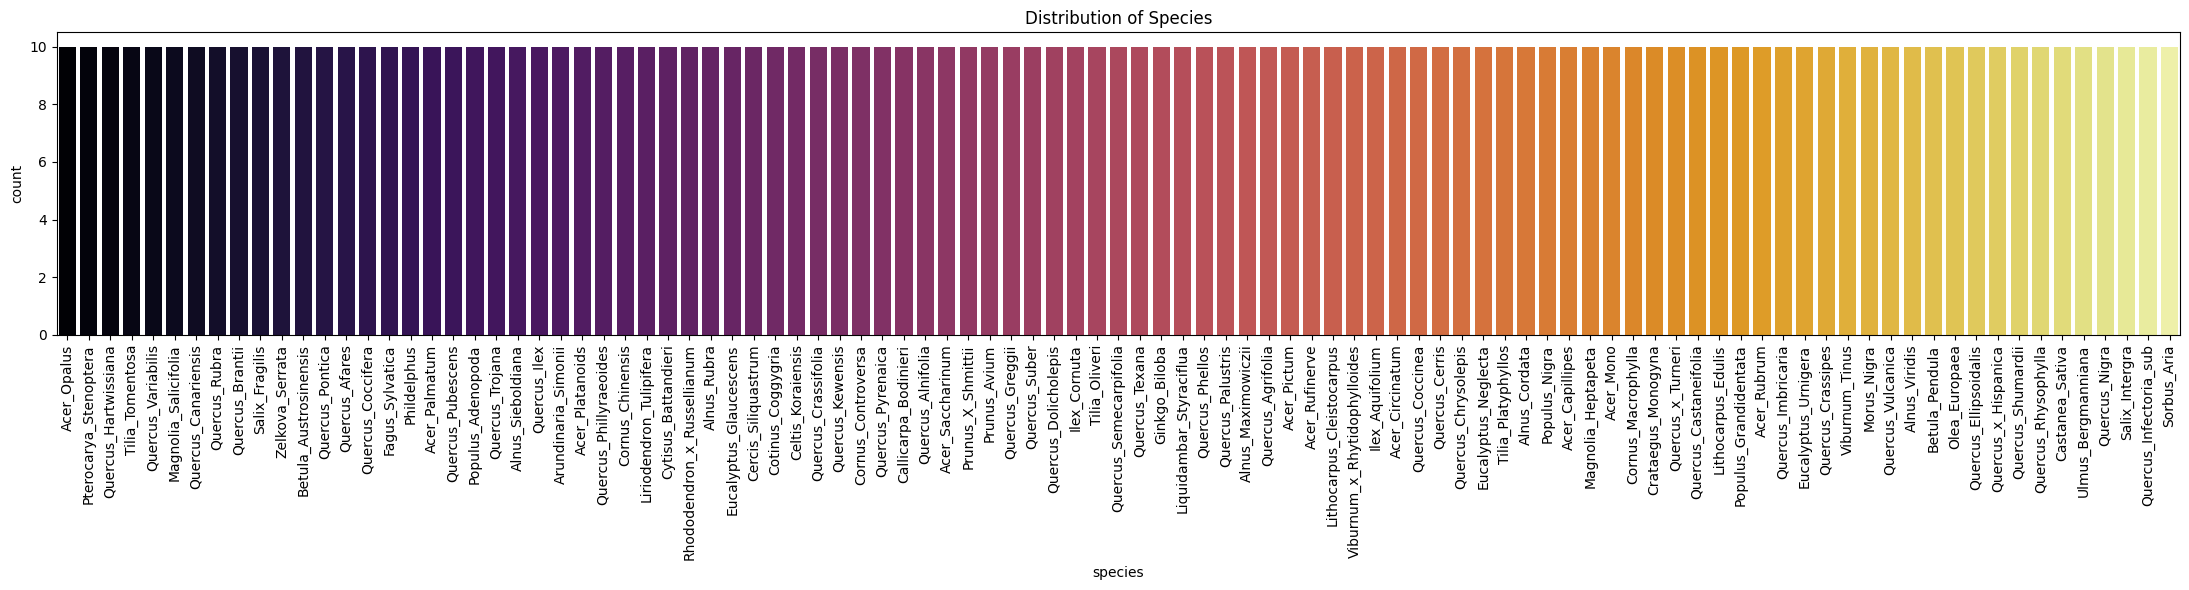

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check the distribution of the target variable (class labels)
plt.figure(figsize=(22, 6))
sns.countplot(x='species', data=df, palette='inferno')
plt.title('Distribution of Species')
plt.xticks(rotation=90)
plt.margins(x=0.0009)
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()




#### 1.4.2 Distribution of Features

In [ ]:
df_features = list(df.loc[:, 'margin1':])

In [ ]:
num_cols = 12
num_features = len(df_features)
num_rows = (num_features // num_cols) + (1 if num_features % num_cols != 0 else 0)

# Create subplots
plt.figure(figsize=(20, 5 * num_rows))
for i, feature in enumerate(df_features, 1):
    plt.subplot(48, 4, i)
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 1.5 Drawing Images

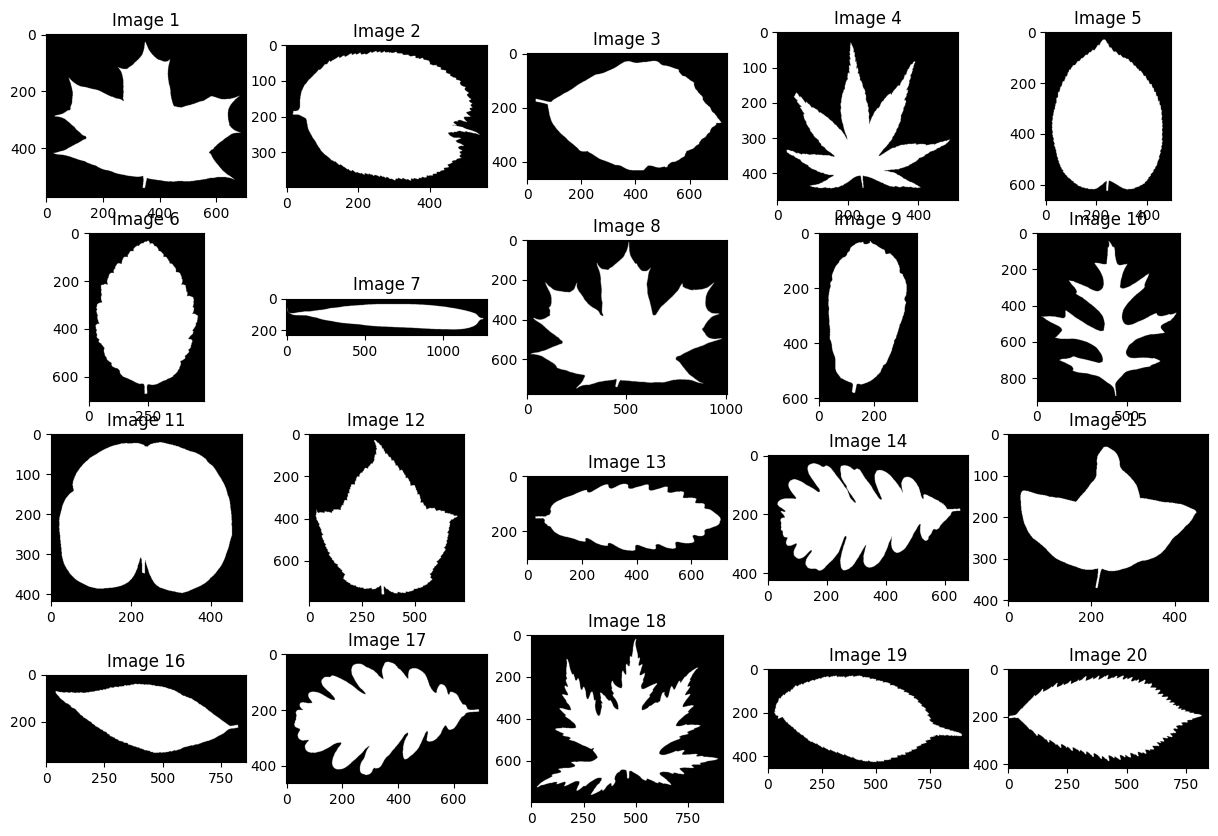

In [ ]:
import os
import matplotlib.pyplot as plt
import random

# Directory containing the image files
image_directory = "images"  # Replace with the actual path to your image directory

# Get a list of all image files in the directory
image_files = [file for file in os.listdir(image_directory) if file.lower().endswith(('.jpg'))]

# Display a random sample of images
num_images_to_display = 20
selected_image_files = random.sample(image_files, num_images_to_display)

plt.figure(figsize=(15, 10))
for i, image_file in enumerate(selected_image_files, 1):
    plt.subplot(4, 5, i)
    img_path = os.path.join(image_directory, image_file)
    img = plt.imread(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f"Image {i}")

plt.show()

### 1.6 Correlation Analysis

<ipython-input-13-d58e4f39cc15>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


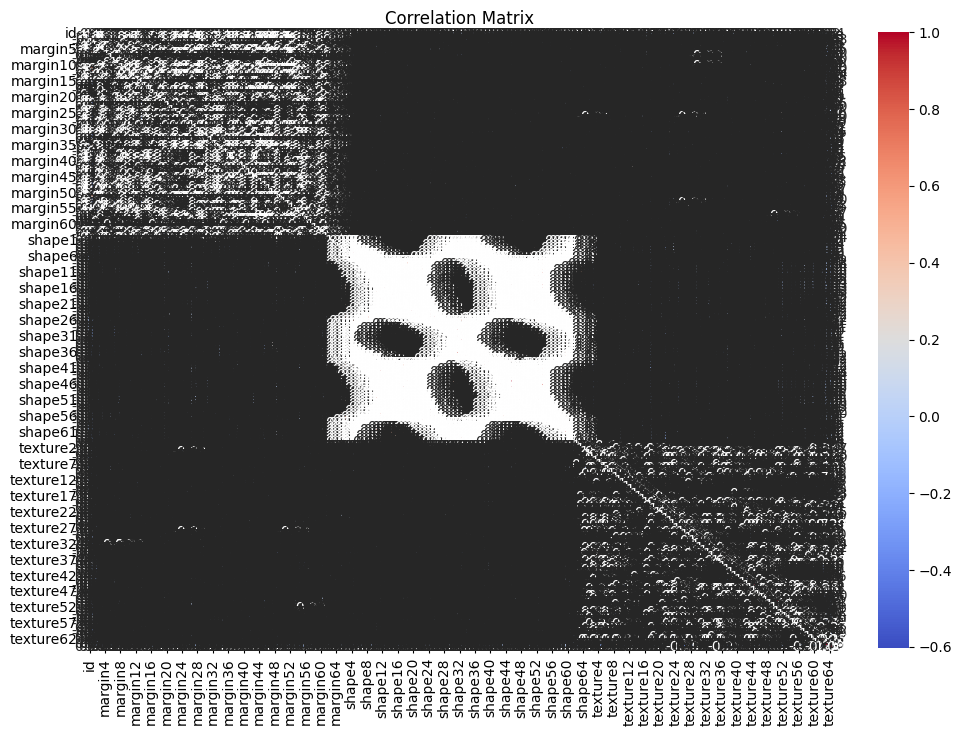

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 1.7 Label Encoding

In [ ]:
label = df.species

new_df = df.drop(['species','id'], axis = 1)

In [ ]:
from sklearn import preprocessing

label_encoder  = preprocessing.LabelEncoder()
label_encoder.fit(label)
species_label = label_encoder.transform(label)

### 1.8 Train/Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_df, species_label ,test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape


((792, 192), (198, 192))

### 1.9 Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

features_standardized = list(x_train_scaled_df.columns.difference(['id', 'species']))

num_cols = 4
num_features = len(features_standardized)
num_rows = (num_features // num_cols) + (1 if num_features % num_cols != 0 else 0)

# Create subplots
plt.figure(figsize=(20, 5 * num_rows))
for i, feature in enumerate(features_standardized, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(x_train_scaled_df[feature], kde=True, bins=20, color='#f0d1e4')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Image Preprocessing

For preprocessing images, we take each image and calculate the absolute differenece between the height and width to make them square shaped by padding each image with a black border. Then we resize all images to 90x90.


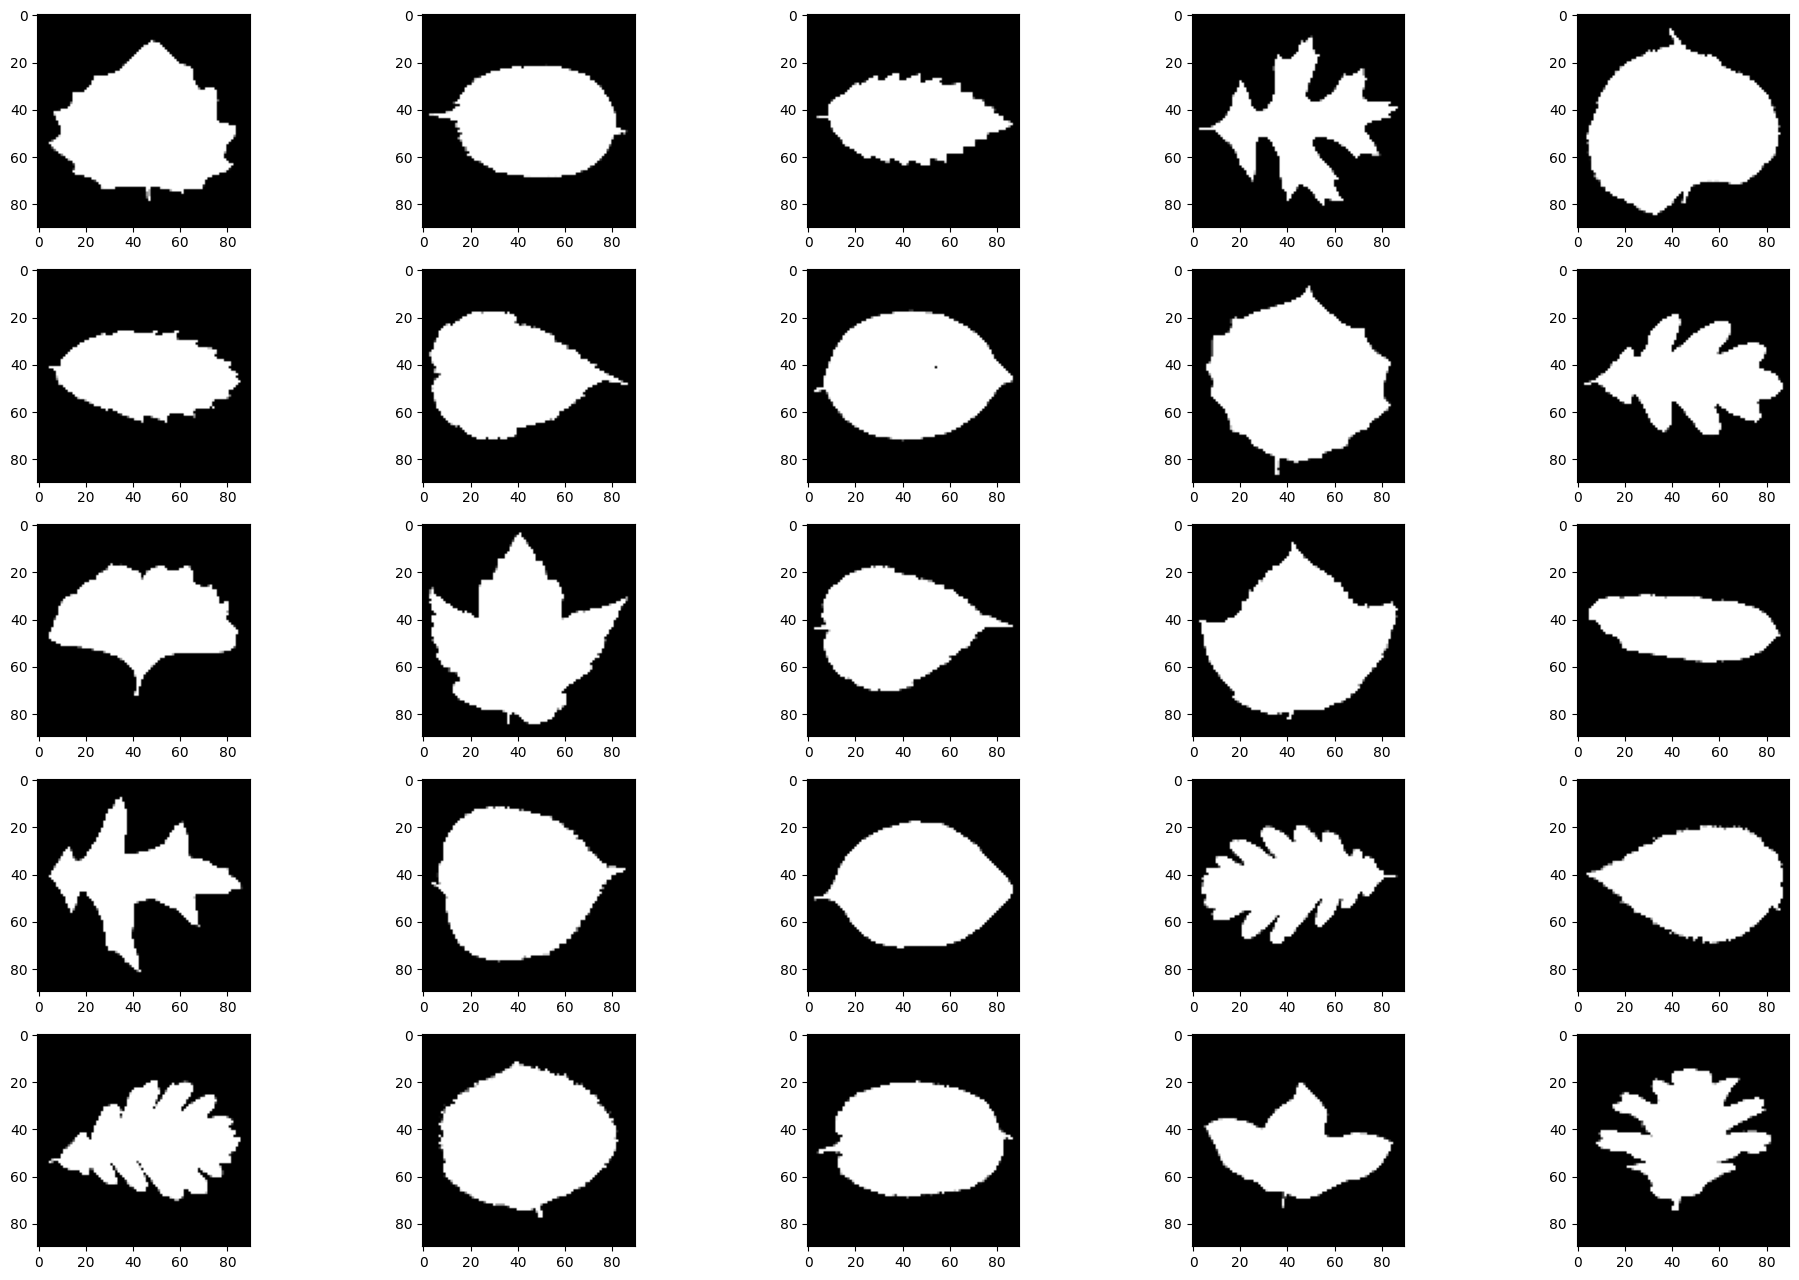

In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt

IMAGE_SIZE = 90

def resize_and_pad_img(img):
    height, width = img.shape
    diff = abs(width - height) // 2
    result = cv2.copyMakeBorder(img, diff, diff, 0, 0, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    return cv2.resize(result, (IMAGE_SIZE, IMAGE_SIZE))

image_list = [resize_and_pad_img(cv2.imread((filename), cv2.IMREAD_GRAYSCALE)) for filename in glob.glob('images/*.jpg')]

plt.figure(figsize=(24, 16))
for i, img in enumerate(image_list[:25], 1):
    plt.subplot(5, 5, i)
    plt.imshow(img, cmap='gray')

plt.show()

Now all images have the same dimension. The resizing and padding are essential steps to ensure uniform dimensions for input images when working with neural networks.

In [ ]:
image_filenames = os.listdir("images")
df_ids = df['id'].tolist()

train_images = [filename for filename in image_filenames if int(filename.split('.')[0]) in df_ids]
train_images = sorted(train_images, key=lambda x: int(x.split('.')[0]))

We retrieved all the images that correspond to the training set in our dataset.

In [ ]:
import numpy as np
from keras.preprocessing import image

X_train_img = np.empty((len(df_ids), IMAGE_SIZE, IMAGE_SIZE, 1))

for i, id_image in enumerate(train_images):
  image_read = cv2.imread(("images/" + id_image), cv2.IMREAD_GRAYSCALE)
  image_changed_to_array = image.img_to_array(resize_and_pad_img(image_read))
  X_train_img[i] = image_changed_to_array

Here, we read grayscale images from our images directory, resizes and pads them to a consistent size (90), and stores the processed images in a numpy array (X_train_img).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_img, species_label, test_size=0.2, random_state=42)

Then we proceed to split the image training set exactly as we did the features dataset.

# 3. Training Neural Network

In [ ]:
import tensorflow as tf;
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, Activation
from keras.optimizers.schedules import ExponentialDecay, InverseTimeDecay, CosineDecay, PolynomialDecay
from keras.optimizers import SGD, Adam, RMSprop
from keras.regularizers import l2
from keras.callbacks import TensorBoard
from sklearn.metrics import accuracy_score
import numpy as np

## 3.1 CNN Architecture
#### Our Convolutional Neural Network consists of the following layers:

#### Part 1: Input Layer

1. Convolutional layer with 32 filters, each of size (3, 3). Input shape: (90,90,1) for grayscale images.

2. Activation Layer: ReLU activation applied after the convolutional layer.

3. Batch normalization to normalize and stabilize activations.

4. Pooling: MaxPooling layer with pool size (2, 2) and strides (2, 2) for down-sampling.

5. Repeat Block: Loop through a block for num_layers - 1 times.
  - Convolutional layer with 64 filters, each of size (3, 3).
  - ReLU activation and batch normalization.
  - MaxPooling layer with pool size (2, 2) and strides (2, 2).

6. Flatten layer to transition from convolutional layers to fully connected layers.

7. Fully Connected Layers with 256 neurons and ReLU activation.

8. Dropout layer with rate specified by dropout rate.

9. Output Layer: A fully connected layer with neurons equal to the number of classes (99 species).

10. Softmax activation: Produces the final probability distribution over the classes.


#### Part 2: Optimizer and Compilation:

The optimizer is specified by the optimizer parameter.
Sparse categorical crossentropy loss for multi-class classification.
Metrics include accuracy.

#### Part 3: Training:

Trained for 30 epochs with the specified batch size.
15% of the training data used for validation.



In [ ]:
def cnn_model(batch_size, num_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler):

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    #filters = 8
    for _ in range(num_layers-1):
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
        #filters *= 2

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    optimizer = optimizer()

    model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    #model.summary()

    history = model.fit(
          x=X_train,
          y=y_train,
          epochs=30,
          batch_size=batch_size,
          validation_split=0.15
      )

    # Get the maximum validation accuracy and its corresponding epoch
    max_val_accuracy = max(history.history['val_accuracy'])
    best_epoch = history.history['val_accuracy'].index(max_val_accuracy) + 1

    print(f"Hyperparameters: Batch Size = {batch_size}, "
          f"Number of Layers = {num_layers}, "
          f"Dropout Rate = {dropout_rate}, "
          f"Optimizer = { optimizer}, "
          f"Weight Decay = {weight_decay}, "
          f"Learning Rate = {learning_rate}, "
          f"Learning Rate Scheduler = {learning_rate_scheduler}. ")
    print(f"Best Validation Accuracy: {max_val_accuracy:.4f} at Epoch {best_epoch}\n")

    return model


## 3.2 Hyperparameter Tuning

#### 3.2.1 Optimizers


In [ ]:
batch_size = 128
number_of_layers = 3
dropout_rate = 0.5
optimizer = keras.optimizers.RMSprop
weight_decay = 0.01
learning_rate = 0.001
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9)

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 88, 88, 32)        320       
                                                                 
 activation_5 (Activation)   (None, 88, 88, 32)        0         
                                                                 
 batch_normalization_35 (Ba  (None, 88, 88, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 44, 44, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 42, 42, 64)        18496     
                                                                 
 batch_normalization_36 (Ba  (None, 42, 42, 64)      

In [ ]:
batch_size = 128
number_of_layers = 3
dropout_rate = 0.5
optimizer = keras.optimizers.SGD
weight_decay = 0.01
learning_rate = 0.001
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9),

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
6/6 [==============================] - 7s 1s/step - loss: 6.0244 - accuracy: 0.0208 - val_loss: 7.3083 - val_accuracy: 0.0168
Epoch 2/30
6/6 [==============================] - 7s 1s/step - loss: 4.3261 - accuracy: 0.0639 - val_loss: 5.3605 - val_accuracy: 0.0420
Epoch 3/30
6/6 [==============================] - 6s 1s/step - loss: 3.9148 - accuracy: 0.1159 - val_loss: 4.8653 - val_accuracy: 0.0504
Epoch 4/30
6/6 [==============================] - 7s 1s/step - loss: 3.4844 - accuracy: 0.2184 - val_loss: 4.6142 - val_accuracy: 0.0588
Epoch 5/30
6/6 [==============================] - 6s 997ms/step - loss: 3.2518 - accuracy: 0.2318 - val_loss: 4.4572 - val_accuracy: 0.0756
Epoch 6/30
6/6 [==============================] - 7s 1s/step - loss: 2.9243 - accuracy: 0.3091 - val_loss: 4.1947 - val_accuracy: 0.1429
Epoch 7/30
6/6 [==============================] - 6s 1s/step - loss: 2.6708 - accuracy: 0.3596 - val_loss: 4.0616 - val_accuracy: 0.1176
Epoch 8/30
6/6 [======================

In [ ]:
batch_size = 128
number_of_layers = 3
dropout_rate = 0.5
optimizer = keras.optimizers.Adam
weight_decay = 0.01
learning_rate = 0.001
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9),

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
6/6 [==============================] - 8s 1s/step - loss: 5.4328 - accuracy: 0.0505 - val_loss: 6.0888 - val_accuracy: 0.0252
Epoch 2/30
6/6 [==============================] - 7s 1s/step - loss: 3.8108 - accuracy: 0.1382 - val_loss: 6.2482 - val_accuracy: 0.0252
Epoch 3/30
6/6 [==============================] - 6s 1s/step - loss: 3.3399 - accuracy: 0.2318 - val_loss: 7.3047 - val_accuracy: 0.0168
Epoch 4/30
6/6 [==============================] - 7s 1s/step - loss: 3.0422 - accuracy: 0.2853 - val_loss: 7.0591 - val_accuracy: 0.0168
Epoch 5/30
6/6 [==============================] - 6s 1s/step - loss: 2.6628 - accuracy: 0.3700 - val_loss: 4.9881 - val_accuracy: 0.0336
Epoch 6/30
6/6 [==============================] - 7s 1s/step - loss: 2.3499 - accuracy: 0.4056 - val_loss: 4.8194 - val_accuracy: 0.0756
Epoch 7/30
6/6 [==============================] - 6s 1s/step - loss: 2.1490 - accuracy: 0.4428 - val_loss: 3.8433 - val_accuracy: 0.0924
Epoch 8/30
6/6 [=========================

Evaluation Summary of Optimizers:
- RmsProb 50.42%
- SGD 47.06%
- **Adam 52.94%**

Since, Adam Optimizer achieved the best validation accuracy, we will set it as the fixed optimizer while tuning for the rest of the hyperparameters.

#### 3.2.2 Learning Rate

In [ ]:
batch_size = 128
number_of_layers = 3
dropout_rate = 0.5
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.01
learning_rate = 0.0001
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9),

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)


Epoch 1/30
6/6 [==============================] - 7s 1s/step - loss: 5.5254 - accuracy: 0.0475 - val_loss: 7.0563 - val_accuracy: 0.0420
Epoch 2/30
6/6 [==============================] - 7s 1s/step - loss: 3.8491 - accuracy: 0.1545 - val_loss: 6.8617 - val_accuracy: 0.0252
Epoch 3/30
6/6 [==============================] - 6s 1s/step - loss: 3.3435 - accuracy: 0.2184 - val_loss: 5.9994 - val_accuracy: 0.0420
Epoch 4/30
6/6 [==============================] - 7s 1s/step - loss: 2.9335 - accuracy: 0.3061 - val_loss: 4.9643 - val_accuracy: 0.0420
Epoch 5/30
6/6 [==============================] - 6s 1s/step - loss: 2.6246 - accuracy: 0.3611 - val_loss: 4.4259 - val_accuracy: 0.0672
Epoch 6/30
6/6 [==============================] - 7s 1s/step - loss: 2.2616 - accuracy: 0.4190 - val_loss: 3.6008 - val_accuracy: 0.1261
Epoch 7/30
6/6 [==============================] - 6s 1s/step - loss: 2.1266 - accuracy: 0.4413 - val_loss: 3.2214 - val_accuracy: 0.2353
Epoch 8/30
6/6 [=========================

In [ ]:
batch_size = 128
number_of_layers = 3
dropout_rate = 0.5
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.01
learning_rate = 0.01
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9),

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)


Epoch 1/30
6/6 [==============================] - 7s 1s/step - loss: 5.5556 - accuracy: 0.0327 - val_loss: 6.1536 - val_accuracy: 0.0084
Epoch 2/30
6/6 [==============================] - 7s 1s/step - loss: 3.8979 - accuracy: 0.1204 - val_loss: 6.6354 - val_accuracy: 0.0252
Epoch 3/30
6/6 [==============================] - 7s 1s/step - loss: 3.5260 - accuracy: 0.1932 - val_loss: 7.7037 - val_accuracy: 0.0336
Epoch 4/30
6/6 [==============================] - 7s 1s/step - loss: 3.1180 - accuracy: 0.2675 - val_loss: 6.0869 - val_accuracy: 0.0252
Epoch 5/30
6/6 [==============================] - 7s 1s/step - loss: 2.8160 - accuracy: 0.3239 - val_loss: 4.9006 - val_accuracy: 0.0756
Epoch 6/30
6/6 [==============================] - 6s 1s/step - loss: 2.4931 - accuracy: 0.3715 - val_loss: 4.4812 - val_accuracy: 0.0924
Epoch 7/30
6/6 [==============================] - 7s 1s/step - loss: 2.2728 - accuracy: 0.4160 - val_loss: 3.7972 - val_accuracy: 0.1092
Epoch 8/30
6/6 [=========================

Evaluation Summary of Learning Rates:
- 0.0001 -> 50.42%
- 0.01   -> 51.26%
- **0.001  -> 52.94%**

Since, the 0.01 learning rate achieved the best validation accuracy, we will set it as the fixed learning rate value while tuning for the rest of the hyperparameters.

#### 3.2.3 Learning Rate Schedulers

In [ ]:
batch_size = 128
number_of_layers = 3
dropout_rate = 0.5
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.01
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = PolynomialDecay( initial_learning_rate = 0.01, decay_steps = 1000),

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)


Epoch 1/30
6/6 [==============================] - 8s 1s/step - loss: 5.4430 - accuracy: 0.0550 - val_loss: 7.2186 - val_accuracy: 0.0336
Epoch 2/30
6/6 [==============================] - 8s 1s/step - loss: 3.6456 - accuracy: 0.1649 - val_loss: 7.5201 - val_accuracy: 0.0840
Epoch 3/30
6/6 [==============================] - 6s 1s/step - loss: 3.1968 - accuracy: 0.2377 - val_loss: 6.5933 - val_accuracy: 0.0504
Epoch 4/30
6/6 [==============================] - 7s 1s/step - loss: 2.6795 - accuracy: 0.3403 - val_loss: 5.2060 - val_accuracy: 0.0840
Epoch 5/30
6/6 [==============================] - 6s 1s/step - loss: 2.3769 - accuracy: 0.3938 - val_loss: 4.2540 - val_accuracy: 0.1008
Epoch 6/30
6/6 [==============================] - 7s 1s/step - loss: 2.1149 - accuracy: 0.4502 - val_loss: 3.7679 - val_accuracy: 0.1429
Epoch 7/30
6/6 [==============================] - 6s 1s/step - loss: 1.8969 - accuracy: 0.5186 - val_loss: 3.3672 - val_accuracy: 0.2269
Epoch 8/30
6/6 [=========================

In [ ]:
batch_size = 128
number_of_layers = 3
dropout_rate = 0.5
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.01
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = CosineDecay(initial_learning_rate=0.01,decay_steps=1000)

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)


Epoch 1/30
6/6 [==============================] - 8s 1s/step - loss: 5.8365 - accuracy: 0.0297 - val_loss: 5.7945 - val_accuracy: 0.0168
Epoch 2/30
6/6 [==============================] - 7s 1s/step - loss: 3.7787 - accuracy: 0.1441 - val_loss: 6.0184 - val_accuracy: 0.0336
Epoch 3/30
6/6 [==============================] - 6s 1s/step - loss: 3.4416 - accuracy: 0.2095 - val_loss: 7.5031 - val_accuracy: 0.0336
Epoch 4/30
6/6 [==============================] - 7s 1s/step - loss: 3.0684 - accuracy: 0.2615 - val_loss: 5.1380 - val_accuracy: 0.0588
Epoch 5/30
6/6 [==============================] - 7s 1s/step - loss: 2.7543 - accuracy: 0.3507 - val_loss: 4.6930 - val_accuracy: 0.0840
Epoch 6/30
6/6 [==============================] - 6s 1s/step - loss: 2.4811 - accuracy: 0.4027 - val_loss: 3.9717 - val_accuracy: 0.1092
Epoch 7/30
6/6 [==============================] - 7s 1s/step - loss: 2.2355 - accuracy: 0.4473 - val_loss: 3.5113 - val_accuracy: 0.1849
Epoch 8/30
6/6 [=========================

Evaluation Summary of Learning Rate Schedulers:
- **Exponential Decay 52.94%**
- Polynomial Decay  47.90 %
- Cosine Decay 47.90 %

Since, the exp learning rate scheduler achieved the best validation accuracy, we will set it as the fixed learning rate scheduler while tuning for the rest of the hyperparameters.

#### 3.2.3 Number of Layers

In [ ]:
batch_size = 128
number_of_layers = 2
dropout_rate = 0.5
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.01
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9) #best learning rate schedule

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
6/6 [==============================] - 11s 1s/step - loss: 9.8625 - accuracy: 0.0461 - val_loss: 5.0283 - val_accuracy: 0.0840
Epoch 2/30
6/6 [==============================] - 7s 1s/step - loss: 4.0049 - accuracy: 0.1367 - val_loss: 4.2011 - val_accuracy: 0.0756
Epoch 3/30
6/6 [==============================] - 7s 1s/step - loss: 3.6861 - accuracy: 0.1412 - val_loss: 4.4424 - val_accuracy: 0.0504
Epoch 4/30
6/6 [==============================] - 11s 2s/step - loss: 3.6154 - accuracy: 0.1828 - val_loss: 4.7790 - val_accuracy: 0.0924
Epoch 5/30
6/6 [==============================] - 10s 2s/step - loss: 3.2319 - accuracy: 0.2422 - val_loss: 4.2643 - val_accuracy: 0.1008
Epoch 6/30
6/6 [==============================] - 10s 1s/step - loss: 3.0406 - accuracy: 0.2868 - val_loss: 3.9867 - val_accuracy: 0.1176
Epoch 7/30
6/6 [==============================] - 9s 1s/step - loss: 2.9431 - accuracy: 0.3061 - val_loss: 3.9193 - val_accuracy: 0.1849
Epoch 8/30
6/6 [=====================

In [ ]:
batch_size = 128
number_of_layers = 4
dropout_rate = 0.5
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.01
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9) #best learning rate schedule

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
6/6 [==============================] - 9s 1s/step - loss: 5.4436 - accuracy: 0.0178 - val_loss: 7.9536 - val_accuracy: 0.0084
Epoch 2/30
6/6 [==============================] - 7s 1s/step - loss: 4.0551 - accuracy: 0.0966 - val_loss: 7.8807 - val_accuracy: 0.0168
Epoch 3/30
6/6 [==============================] - 8s 1s/step - loss: 3.6492 - accuracy: 0.1813 - val_loss: 7.9923 - val_accuracy: 0.0168
Epoch 4/30
6/6 [==============================] - 8s 1s/step - loss: 3.2685 - accuracy: 0.2229 - val_loss: 7.9638 - val_accuracy: 0.0336
Epoch 5/30
6/6 [==============================] - 6s 1s/step - loss: 2.7526 - accuracy: 0.3254 - val_loss: 7.7415 - val_accuracy: 0.0252
Epoch 6/30
6/6 [==============================] - 7s 1s/step - loss: 2.4005 - accuracy: 0.4190 - val_loss: 6.3999 - val_accuracy: 0.0336
Epoch 7/30
6/6 [==============================] - 6s 1s/step - loss: 2.1767 - accuracy: 0.4651 - val_loss: 5.5272 - val_accuracy: 0.0420
Epoch 8/30
6/6 [=========================

Evaluation Summary of Number of Convulotional Layers:
- 2 layers -> 42.86%
- **3 layers -> 52.94%**
- 4 layers -> 44.54%

Since, the 3 layers achieved the best validation accuracy, we will set it as the fixed number of layers while tuning for the rest of the hyperparameters.

#### 3.2.5 Batch Size

In [ ]:
batch_size = 32
number_of_layers = 3 #best number of layers
dropout_rate = 0.5
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.01
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9) #best learning rate schedule

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
22/22 [==============================] - 7s 257ms/step - loss: 5.1549 - accuracy: 0.0490 - val_loss: 5.1048 - val_accuracy: 0.0252
Epoch 2/30
22/22 [==============================] - 6s 282ms/step - loss: 3.9369 - accuracy: 0.1114 - val_loss: 4.9141 - val_accuracy: 0.0588
Epoch 3/30
22/22 [==============================] - 6s 252ms/step - loss: 3.6448 - accuracy: 0.1724 - val_loss: 3.9298 - val_accuracy: 0.1092
Epoch 4/30
22/22 [==============================] - 6s 277ms/step - loss: 3.3684 - accuracy: 0.2169 - val_loss: 3.6814 - val_accuracy: 0.1345
Epoch 5/30
22/22 [==============================] - 5s 249ms/step - loss: 3.0504 - accuracy: 0.2734 - val_loss: 3.4800 - val_accuracy: 0.1765
Epoch 6/30
22/22 [==============================] - 6s 281ms/step - loss: 2.7690 - accuracy: 0.3210 - val_loss: 3.1355 - val_accuracy: 0.2437
Epoch 7/30
22/22 [==============================] - 5s 244ms/step - loss: 2.5508 - accuracy: 0.3462 - val_loss: 3.1749 - val_accuracy: 0.1765
Epoch 

In [ ]:
batch_size = 64
number_of_layers = 3 #best number of layers
dropout_rate = 0.5
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.01
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9) #best learning rate schedule

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
11/11 [==============================] - 10s 792ms/step - loss: 5.2100 - accuracy: 0.0609 - val_loss: 10.4557 - val_accuracy: 0.0000e+00
Epoch 2/30
11/11 [==============================] - 8s 745ms/step - loss: 3.5807 - accuracy: 0.1516 - val_loss: 8.2033 - val_accuracy: 0.0168
Epoch 3/30
11/11 [==============================] - 9s 849ms/step - loss: 3.0775 - accuracy: 0.2467 - val_loss: 6.8625 - val_accuracy: 0.0252
Epoch 4/30
11/11 [==============================] - 8s 712ms/step - loss: 2.7101 - accuracy: 0.3120 - val_loss: 4.0194 - val_accuracy: 0.0840
Epoch 5/30
11/11 [==============================] - 7s 637ms/step - loss: 2.3657 - accuracy: 0.3952 - val_loss: 3.7780 - val_accuracy: 0.1092
Epoch 6/30
11/11 [==============================] - 9s 876ms/step - loss: 2.0763 - accuracy: 0.4473 - val_loss: 3.0316 - val_accuracy: 0.2353
Epoch 7/30
11/11 [==============================] - 7s 584ms/step - loss: 1.7495 - accuracy: 0.5349 - val_loss: 2.5811 - val_accuracy: 0.2773


In [ ]:
batch_size = 256
number_of_layers = 3 #best number of layers
dropout_rate = 0.5
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.01
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9) #best learning rate schedule

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
3/3 [==============================] - 9s 3s/step - loss: 6.4854 - accuracy: 0.0267 - val_loss: 6.9380 - val_accuracy: 0.0084
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 3.8453 - accuracy: 0.1248 - val_loss: 7.6804 - val_accuracy: 0.0000e+00
Epoch 3/30
3/3 [==============================] - 8s 2s/step - loss: 3.5123 - accuracy: 0.1872 - val_loss: 8.6515 - val_accuracy: 0.0084
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 3.0867 - accuracy: 0.2541 - val_loss: 7.7383 - val_accuracy: 0.0168
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 2.8172 - accuracy: 0.2912 - val_loss: 6.9311 - val_accuracy: 0.0252
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 2.5224 - accuracy: 0.3715 - val_loss: 6.6166 - val_accuracy: 0.0420
Epoch 7/30
3/3 [==============================] - 8s 2s/step - loss: 2.2497 - accuracy: 0.4220 - val_loss: 5.7122 - val_accuracy: 0.0672
Epoch 8/30
3/3 [=====================

Evaluation Summary of Batch Size:
- 32 -> 57.14%
- **64 -> 58.82%**
- 128 -> 52.94%
- 256 -> 50.42%

Since, batch size of 64 achieved the best validation accuracy, we will set it as the fixed value of batch size while tuning for the rest of the hyperparameters.

#### 3.2.6 Dropout Rate

In [ ]:
batch_size = 64 #best batch size
number_of_layers = 3 #best number of layers
dropout_rate = 0.4
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.01
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9) #best learning rate schedule

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
11/11 [==============================] - 8s 627ms/step - loss: 5.2461 - accuracy: 0.0684 - val_loss: 5.3654 - val_accuracy: 0.0168
Epoch 2/30
11/11 [==============================] - 6s 538ms/step - loss: 3.4752 - accuracy: 0.1961 - val_loss: 6.9285 - val_accuracy: 0.0420
Epoch 3/30
11/11 [==============================] - 7s 628ms/step - loss: 2.8482 - accuracy: 0.3031 - val_loss: 5.6367 - val_accuracy: 0.0420
Epoch 4/30
11/11 [==============================] - 6s 536ms/step - loss: 2.4304 - accuracy: 0.3878 - val_loss: 4.4887 - val_accuracy: 0.1008
Epoch 5/30
11/11 [==============================] - 7s 617ms/step - loss: 2.0256 - accuracy: 0.4725 - val_loss: 3.5294 - val_accuracy: 0.1849
Epoch 6/30
11/11 [==============================] - 6s 532ms/step - loss: 1.5916 - accuracy: 0.5914 - val_loss: 3.1262 - val_accuracy: 0.2521
Epoch 7/30
11/11 [==============================] - 7s 616ms/step - loss: 1.3505 - accuracy: 0.6211 - val_loss: 2.5905 - val_accuracy: 0.3445
Epoch 

In [ ]:
batch_size = 64 #best batch size
number_of_layers = 3 #best number of layers
dropout_rate = 0.6
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.01
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9) #best learning rate schedule

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
11/11 [==============================] - 14s 991ms/step - loss: 5.6740 - accuracy: 0.0357 - val_loss: 5.4506 - val_accuracy: 0.0252
Epoch 2/30
11/11 [==============================] - 9s 784ms/step - loss: 3.9941 - accuracy: 0.0951 - val_loss: 5.3119 - val_accuracy: 0.0504
Epoch 3/30
11/11 [==============================] - 6s 529ms/step - loss: 3.6814 - accuracy: 0.1694 - val_loss: 5.0797 - val_accuracy: 0.0336
Epoch 4/30
11/11 [==============================] - 7s 614ms/step - loss: 3.3940 - accuracy: 0.2259 - val_loss: 4.7668 - val_accuracy: 0.0252
Epoch 5/30
11/11 [==============================] - 6s 581ms/step - loss: 3.1945 - accuracy: 0.2481 - val_loss: 4.0588 - val_accuracy: 0.1008
Epoch 6/30
11/11 [==============================] - 12s 1s/step - loss: 2.9540 - accuracy: 0.2868 - val_loss: 3.9306 - val_accuracy: 0.0924
Epoch 7/30
11/11 [==============================] - 10s 873ms/step - loss: 2.7862 - accuracy: 0.3269 - val_loss: 3.5138 - val_accuracy: 0.1429
Epoch 

Evaluation Summary of Dropout Rate:
- 0.4 -> 55.46%
- **0.5 -> 58.82%**
- 0.6 -> 52.10%

Since, the dropout rate 0.5 achieved the best validation accuracy, we will set it as the fixed dropout rate while tuning for the rest of the hyperparameters.

#### 3.2.7 Weight Decay

In [ ]:
batch_size = 64 #best batch size
number_of_layers = 3 #best number of layers
dropout_rate = 0.5 #best dropout rate
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.001
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9) #best learning rate schedule

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
11/11 [==============================] - 8s 626ms/step - loss: 5.2359 - accuracy: 0.0550 - val_loss: 5.5570 - val_accuracy: 0.0168
Epoch 2/30
11/11 [==============================] - 6s 533ms/step - loss: 3.6255 - accuracy: 0.1902 - val_loss: 5.2137 - val_accuracy: 0.0420
Epoch 3/30
11/11 [==============================] - 7s 611ms/step - loss: 3.1299 - accuracy: 0.2600 - val_loss: 4.9359 - val_accuracy: 0.0840
Epoch 4/30
11/11 [==============================] - 7s 664ms/step - loss: 2.8150 - accuracy: 0.3299 - val_loss: 3.8096 - val_accuracy: 0.1849
Epoch 5/30
11/11 [==============================] - 8s 717ms/step - loss: 2.4079 - accuracy: 0.4027 - val_loss: 3.4887 - val_accuracy: 0.1849
Epoch 6/30
11/11 [==============================] - 6s 544ms/step - loss: 2.1148 - accuracy: 0.4413 - val_loss: 3.1500 - val_accuracy: 0.2437
Epoch 7/30
11/11 [==============================] - 8s 723ms/step - loss: 1.7108 - accuracy: 0.5215 - val_loss: 2.6266 - val_accuracy: 0.3697
Epoch 

In [ ]:
batch_size = 64 #best batch size
number_of_layers = 3 #best number of layers
dropout_rate = 0.5 #best dropout rate
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.05
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9) #best learning rate schedule

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
11/11 [==============================] - 7s 551ms/step - loss: 5.4569 - accuracy: 0.0520 - val_loss: 6.4116 - val_accuracy: 0.0672
Epoch 2/30
11/11 [==============================] - 8s 788ms/step - loss: 3.8074 - accuracy: 0.1620 - val_loss: 5.8011 - val_accuracy: 0.0504
Epoch 3/30
11/11 [==============================] - 6s 554ms/step - loss: 3.3380 - accuracy: 0.2288 - val_loss: 4.9471 - val_accuracy: 0.1092
Epoch 4/30
11/11 [==============================] - 8s 750ms/step - loss: 2.8808 - accuracy: 0.2987 - val_loss: 3.9136 - val_accuracy: 0.1092
Epoch 5/30
11/11 [==============================] - 8s 770ms/step - loss: 2.5456 - accuracy: 0.3863 - val_loss: 3.6359 - val_accuracy: 0.1597
Epoch 6/30
11/11 [==============================] - 8s 746ms/step - loss: 2.2347 - accuracy: 0.4383 - val_loss: 2.8935 - val_accuracy: 0.2437
Epoch 7/30
11/11 [==============================] - 10s 896ms/step - loss: 1.9863 - accuracy: 0.4651 - val_loss: 2.7419 - val_accuracy: 0.2437
Epoch

In [ ]:
batch_size = 64 #best batch size
number_of_layers = 3 #best number of layers
dropout_rate = 0.5 #best dropout rate
optimizer = keras.optimizers.Adam #best optimizer
weight_decay = 0.1
learning_rate = 0.001 #best learning rate
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9) #best learning rate schedule

model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

Epoch 1/30
11/11 [==============================] - 13s 882ms/step - loss: 5.6267 - accuracy: 0.0431 - val_loss: 5.6052 - val_accuracy: 0.0084
Epoch 2/30
11/11 [==============================] - 6s 551ms/step - loss: 3.8521 - accuracy: 0.1426 - val_loss: 5.5247 - val_accuracy: 0.0252
Epoch 3/30
11/11 [==============================] - 7s 613ms/step - loss: 3.3866 - accuracy: 0.2155 - val_loss: 4.7554 - val_accuracy: 0.0504
Epoch 4/30
11/11 [==============================] - 6s 556ms/step - loss: 2.9140 - accuracy: 0.2942 - val_loss: 4.2463 - val_accuracy: 0.0588
Epoch 5/30
11/11 [==============================] - 7s 624ms/step - loss: 2.6955 - accuracy: 0.3388 - val_loss: 3.6289 - val_accuracy: 0.1176
Epoch 6/30
11/11 [==============================] - 6s 552ms/step - loss: 2.1970 - accuracy: 0.4160 - val_loss: 3.2278 - val_accuracy: 0.2017
Epoch 7/30
11/11 [==============================] - 7s 622ms/step - loss: 2.0356 - accuracy: 0.4740 - val_loss: 2.8895 - val_accuracy: 0.2437
Epoch

Evaluation Summary of Weight Decay:
- 0.001 -> 53.78%
- **0.01  -> 58.82%**
- 0.05  -> 57.98%
- 0.1 -> 55.46%

Since, the weight decay value 0.05 achieved the best validation accuracy, we will set it as the fixed weight decay value.

# 4. Testing and Evaluation

Now we'll test using the hyperparameters that acheives the highest validation accuracy in training:
  - **Batch Size: 64**
  - **Number of Layers: 3**
  - **Dropout Rate: 0.5**
  - **Optimizer: Adam**
  - **Weight Decay:0.01**
  - **Learning Rate: 0.001**
  - **Learning Rate Scheduler: Exponential Decay**

In [ ]:
def cnn_model(batch_size, num_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler):

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    filters = 8
    for _ in range(num_layers-1):
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
        filters *= 2

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    optimizer = optimizer()

    model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    #model.summary()

    history = model.fit(
          x=X_train,
          y=y_train,
          epochs=30,
          batch_size=batch_size,
          validation_split=0.15
      )

    return history, model


In [ ]:
batch_size = 64
number_of_layers = 3
dropout_rate = 0.5
optimizer = keras.optimizers.Adam
weight_decay = 0.01
learning_rate = 0.001
learning_rate_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9)

history, model = cnn_model(batch_size, number_of_layers, dropout_rate, optimizer, weight_decay, learning_rate, learning_rate_scheduler)

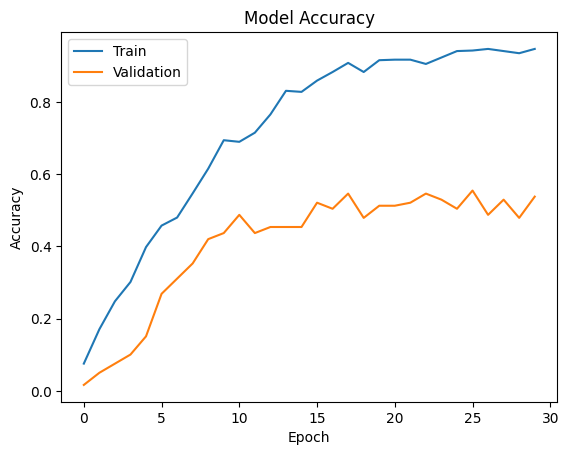

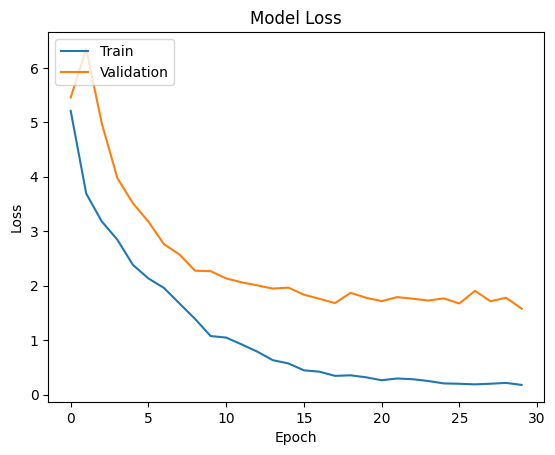

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(np.array(X_test), np.array(y_test))
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

7/7 [==============================] - 1s 104ms/step - loss: 1.4736 - accuracy: 0.6111
Test Loss: 1.4735506772994995, Test Accuracy: 0.6111111044883728


In [ ]:
!jupyter nbconvert --to pdf "/content/drive/My Drive/Colab Notebooks/leaf-classification.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/leaf-classification.ipynb to pdf
[NbConvertApp] Support files will be in leaf-classification_files/
[NbConvertApp] Making directory ./leaf-classification_files
[NbConvertApp] Making directory ./leaf-classification_files
[NbConvertApp] Making directory ./leaf-classification_files
[NbConvertApp] Making directory ./leaf-classification_files
[NbConvertApp] Making directory ./leaf-classification_files
[NbConvertApp] Making directory ./leaf-classification_files
[NbConvertApp] Writing 176137 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 965786 bytes to /content/drive/My Drive/Colab Notebooks/leaf-classification.pdf
